In [1]:
import matplotlib.pyplot as plt
from sklearn import metrics
import math
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# load models
import sys
sys.path.append('../')
from database.models import Incidencia, AccidentKMeans, get_db_session

In [2]:
# Load data
session = get_db_session('sqlite:///../incidences.db')
data = session.query(Incidencia.longitud,
                     Incidencia.latitud).filter(Incidencia.tipo == 'Accidente').all()
X = data

In [3]:
# Set default values
init = 'random'
iterations = 1
max_iter = 300
tol = 1e-04
random_state = 0

# obtained in the last step
k = 101

In [4]:
# Apply KMeans and obtain the labels
km = KMeans(k, init, n_init=iterations , max_iter=max_iter, tol=tol, random_state=random_state)
labels = km.fit_predict(X)

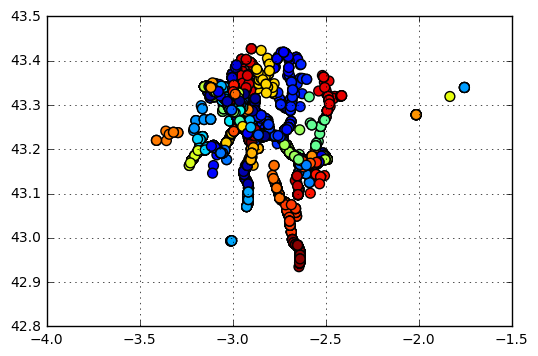

In [5]:
plt.scatter([row[0] for row in X], [row[1] for row in X], c=labels,s=50)
plt.grid()
plt.show()

In [6]:
# Now we save the data into a new model
session = get_db_session('sqlite:///../incidences.db')
data = session.query(Incidencia.longitud, 
                     Incidencia.latitud,
                     Incidencia.id).filter(Incidencia.tipo == 'Accidente').all()

for index, label in enumerate(labels):
    accident = AccidentKMeans()
    accident.longitud = data[index][0]
    accident.latitud = data[index][1]
    accident.num_cluster = label
    accident.foreign_accident = data[index][2]
    session.add(accident)

In [7]:
# save changes
session.commit()